## Importing the dependencies

In [1]:
import numpy as np , pandas as pd , matplotlib.pyplot as plt ,seaborn as sns 
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 

## Data collection & preprocessing 

In [2]:
# loading the data by using pandas library
titanic = pd.read_csv('tested (1).csv')

In [3]:
# the first 5 rows in the data 
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# the information of data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
# finding the counts of missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
# handling the missing values of Age by using mean 
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [7]:
# handling the missing values of Fare by using median 
titanic['Fare'].fillna(titanic['Fare'].median(), inplace=True)

In [8]:
# droping the cabin colum from the data
titanic = titanic.drop(columns=['Cabin'], axis=1)

In [9]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [10]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
# the statistical measures of the data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.576535
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.850103
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Data Analyzation

In [12]:
# values of pclass
titanic['Pclass'].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

In [13]:
# values of Sex
titanic['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

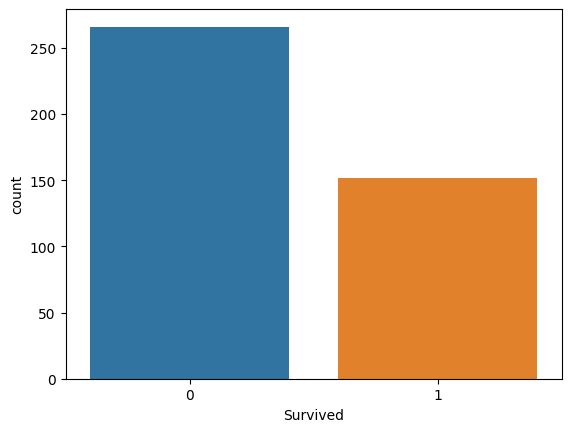

In [14]:
# making a count plot for Survival
sns.countplot(x='Survived', data=titanic)

### Survived:
* 0 : stands for No
* 1 : stands for Yes

<Axes: xlabel='Pclass', ylabel='count'>

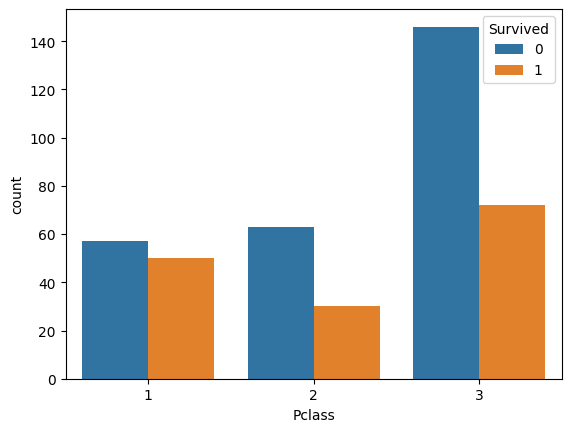

In [15]:
# making a count plot between Pclass and Survived
sns.countplot(x='Pclass', hue='Survived', data=titanic)

<Axes: xlabel='Sex', ylabel='count'>

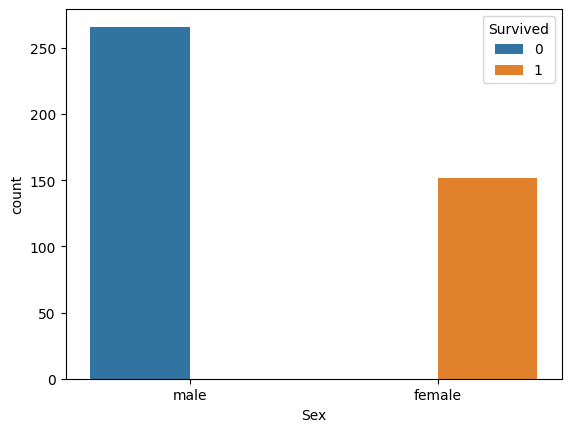

In [16]:
# making a count plot between Sex and Survived
sns.countplot(x='Sex', hue='Survived', data=titanic)

In [17]:
# values of Embarked
titanic['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [18]:
# replacing the text data into numeric values
# sex column
titanic.replace({"Sex":{'male':0,'female':1}},inplace=True)
# embarked column
titanic.replace({"Embarked":{'S':0,'C':1,'Q':2}},inplace=True)

In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int64  
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 36.0+ KB


## Seprating the data 

In [20]:
x = titanic.drop(columns=['PassengerId','Survived','Name','Ticket'], axis = 1)
y = titanic['Survived']

### Train Test Split for splitting the data

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

## Model 

In [27]:
LR = LogisticRegression(max_iter=1000)

In [28]:
LR.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

## Evaluation

* Accuracy Score 

In [29]:
# Accuracy on training data
x_train_prediction = LR.predict(x_train)
training_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data: ',training_accuracy)

Accuracy on training data:  1.0


In [30]:
# Accuracy on test data
x_test_prediction = LR.predict(x_test)
testing_accuracy = accuracy_score(x_test_prediction,y_test)
print('Accuracy on testing data: ',testing_accuracy)

Accuracy on testing data:  1.0


* Cross Validation Score

In [31]:
CV_Score = cross_val_score(LR,x,y,cv=5)
mean_accuracy = sum(CV_Score)/len(CV_Score)
mean_accuracy = mean_accuracy*100
mean_accuracy = round(mean_accuracy,2)
print('Cross Vlidation Accuracies of: ',LR,' = ',CV_Score)
print('Mean Accuracy Score of: ',LR,' = ',mean_accuracy,'%')

Cross Vlidation Accuracies of:  LogisticRegression(max_iter=1000)  =  [1. 1. 1. 1. 1.]
Mean Accuracy Score of:  LogisticRegression(max_iter=1000)  =  100.0 %
